In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
df = pd.read_csv("/Users/lenkwok/Downloads/winequality-red 2.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [44]:
# Describe columns

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000
mean,3.554936e-16,1.733031e-16,-8.887339e-17,-1.244227e-16,2.132961e-16,-6.221137e-17,4.443669e-17,-3.473172e-14,2.861723e-15,6.754377e-16,1.066481e-16,5.636023
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,0.807569
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00,3.000000
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01,5.000000
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01,6.000000
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01,6.000000
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00,8.000000


In [46]:
# Find null values in the data

null_values = df.isnull().sum()
null_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

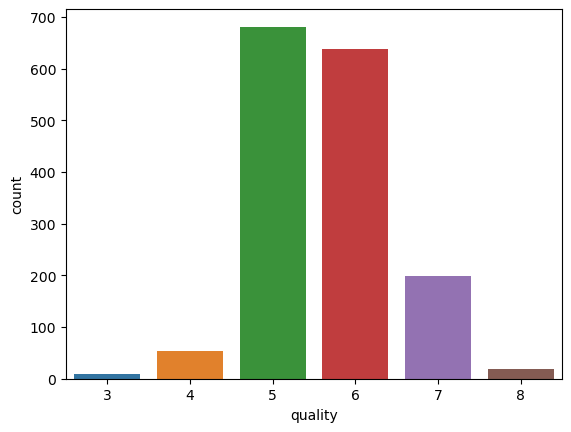

In [43]:
sns.countplot(x="quality", data=df)
plt.show()

In [ ]:
#The heat map above is created using the correlation matrix of the DataFrame 'df'.

A correlation matrix is a table that shows the correlation coefficients between variables in a dataset. The correlation coefficient measures the strength and direction of the linear relationship between two variables. It ranges from -1 to 1, where -1 indicates a strong negative correlation, 1 indicates a strong positive correlation, and 0 indicates no correlation.

In the heat map, each cell represents the correlation coefficient between two variables. The color of the cell indicates the strength of the correlation, with darker colors representing stronger correlations.

The heat map is a useful visualization tool to identify patterns and relationships between variables in a dataset. It can help in feature selection, identifying multicollinearity, and understanding the overall structure of the data.

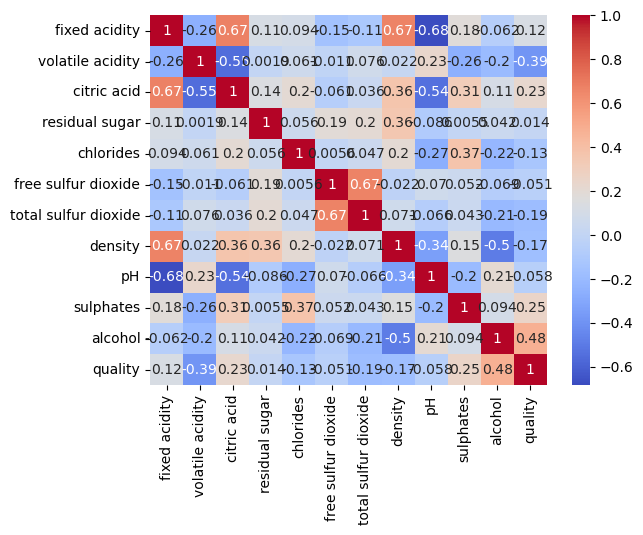

In [13]:
# Calculate the correlation matrix of the DataFrame 'df'
corr = df.corr()

# Create a heatmap using the correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm")

# Display the heatmap
plt.show()

<Axes: xlabel='quality', ylabel='alcohol'>

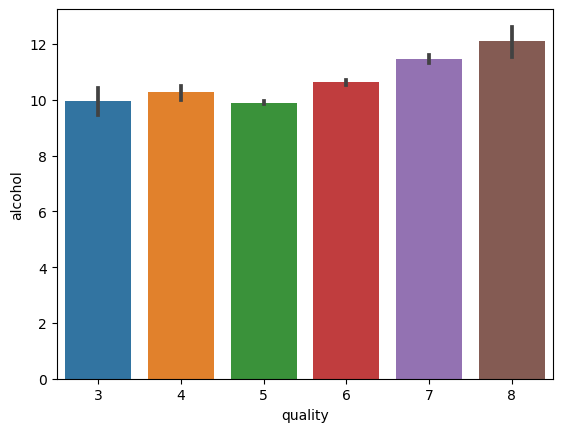

In [14]:
# plotting a barplot for alcohol vs quality
sns.barplot(x='quality', y='alcohol', data=df)

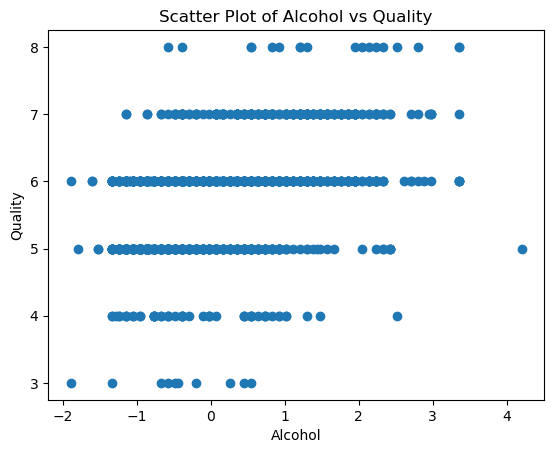

In [37]:
# Creating a scatter plot
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Scatter Plot of Alcohol vs Quality')
plt.show()

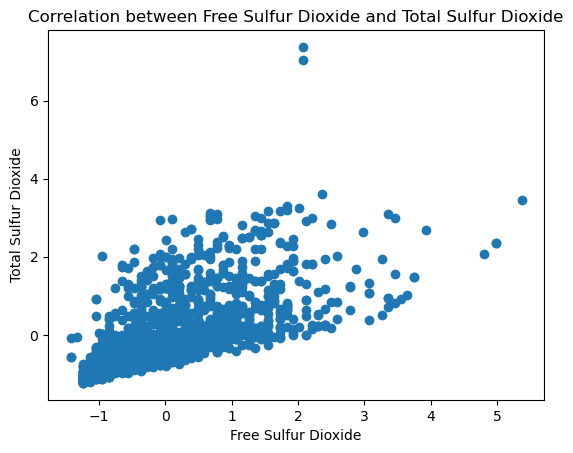

In [40]:
#Plot correlation graph of free sulphate dioxide and total sulphate dioxide


plt.scatter(df['free sulfur dioxide'], df['total sulfur dioxide'])
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.title('Correlation between Free Sulfur Dioxide and Total Sulfur Dioxide')
plt.show()


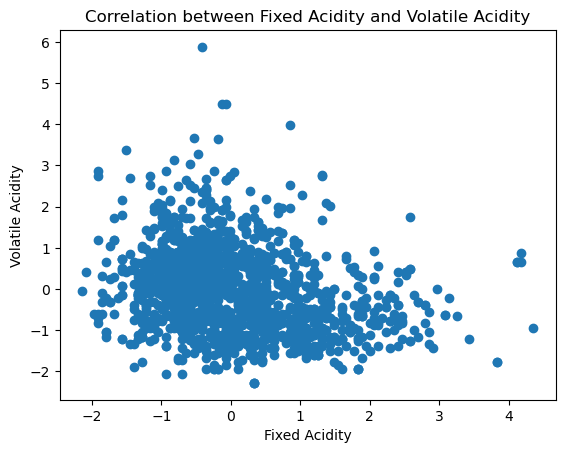

In [41]:
# Plot correlation graph of fixed and volatile acidity

plt.scatter(df['fixed acidity'], df['volatile acidity'])
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.title('Correlation between Fixed Acidity and Volatile Acidity')
plt.show()

# Feature Engineering

In this section, we will perform some feature engineering on the dataset to create new features that might be useful for our analysis and modeling.

In [19]:
X = df.drop('quality', axis=1)
y = df['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [20]:
# Import the necessary library
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select the numerical columns to be scaled
numerical_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Scale the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the updated dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5


In [21]:
# Check Quality has how many bad and good values
y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [22]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
## Modeling using Decision Trees

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_dt = dt_classifier.predict(X_test)

## Modeling using Decision Trees

# Calculate accuracy for Decision Trees Classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy for Decision Tree Classifier:', accuracy_dt)

Accuracy for Decision Tree Classifier: 0.890625


In [30]:
## Modeling using Logistic Regression

from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression Classifier
lr_classifier = LogisticRegression()

# Fit the classifier to the training data
lr_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_lr = lr_classifier.predict(X_test)

# Calculate accuracy for Logistic Regression Classifier
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

/Users/lenkwok/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.865625

In [29]:
## Modeling using Support Vector Machines

from sklearn.svm import SVC

# Create a Support Vector Machines Classifier
svm_classifier = SVC()

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy for Support Vector Machines Classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('Accuracy for Support Vector Machines Classifier:', accuracy_svm)

Accuracy for Support Vector Machines Classifier: 0.85625


In [31]:
## Modeling using Random Forest

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy for Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy for Random Forest Classifier:', accuracy_rf)


Accuracy for Random Forest Classifier: 0.903125


In [32]:
from sklearn.metrics import classification_report

# Generate classification report for Random Forest Classifier
classification_report_rf = classification_report(y_test, y_pred_rf)
print(classification_report_rf)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.74      0.53      0.62        47

    accuracy                           0.90       320
   macro avg       0.83      0.75      0.78       320
weighted avg       0.90      0.90      0.90       320



In [33]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix for Random Forest Classifier
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix_rf)

[[264   9]
 [ 22  25]]


In [34]:
## Predicting Quality using Random Forest

# Create a new input
new_input = [[7.4, 0.7, 0, 0.19, 0.076, 11, 34, 0.997, 3.2, 0.65, 9.4]]

# Predict the quality using the trained Random Forest Classifier
predicted_quality = rf_classifier.predict(new_input)

# Print the predicted quality
print('Predicted Quality:', predicted_quality)


Predicted Quality: [0]


/Users/lenkwok/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
